Banco de dados com valores de alugueis de imóveis de 5 cidades brasileiras: São Paulo, Rio de Janeiro, Belo Horizonte, Porto Alegre e Campinas.

Fazer a predição dos valores através de modelos que utilizam regressão.

Fonte: https://www.kaggle.com/datasets/fabiobarreto/imoveis-aluguel

# **Análise exploratória**

## **Importando os dados**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv("casas_aluguel.csv")

In [89]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


**Procurando amostras duplicadas e retirando:**

In [90]:
df.duplicated().sum()

358

In [91]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True)

Verificando se há dados nulos

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10334 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10334 non-null  object
 1   area                 10334 non-null  int64 
 2   rooms                10334 non-null  int64 
 3   bathroom             10334 non-null  int64 
 4   parking spaces       10334 non-null  int64 
 5   floor                10334 non-null  object
 6   animal               10334 non-null  object
 7   furniture            10334 non-null  object
 8   hoa (R$)             10334 non-null  int64 
 9   rent amount (R$)     10334 non-null  int64 
 10  property tax (R$)    10334 non-null  int64 
 11  fire insurance (R$)  10334 non-null  int64 
 12  total (R$)           10334 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Vemos que na coluna "floor" não há dados nulos, mas foi preenchido por "-" nos espaços vazios. Vamos transformar em "NaN" para um melhor tratamento na criação dos modelos.

In [93]:
df["floor"].value_counts()

-      2371
1      1000
2       952
3       895
4       727
5       580
6       530
7       488
8       486
9       360
10      352
11      296
12      255
13      195
14      168
15      143
16      108
17       95
18       74
19       53
20       43
21       42
22       24
23       23
25       19
24       18
26       13
27        8
28        5
29        5
32        2
35        1
46        1
301       1
51        1
Name: floor, dtype: int64

In [94]:
df["floor"].replace("-", np.nan, inplace=True)

Verificamos que os valores da coluna "floor" estão em string, vamos transforma-la em valores inteiros, pois se trata de números, mas antes vamos retirar os valores nulos que não nos interessam neste momento, ele será tratado posteriormente na criação do modelo de machine learning.

In [95]:
df = df.dropna()

In [96]:
lista = []
for num in df["floor"]:
    num2 = int(num)
    lista.append(num2)
    
df["floor"] = lista
df["floor"]

0         7
1        20
2         6
3         2
4         1
         ..
10686     8
10687     5
10688    17
10689     8
10690     8
Name: floor, Length: 7963, dtype: int64

## **Algumas estatística do Target**

### **Correlação:**

**Vemos abaixo nos dois gráficos que há correlações positivas altas e baixas entre as Features e o Target, mas não há correlação negativa de acordo com a correlação de Pearson.**

In [97]:
df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7.963000e+03,7963.000000,7963.000000,7963.000000,7.963000e+03
mean,126.897903,2.368203,2.086400,1.388547,6.619741,1.376190e+03,3637.493533,353.787141,47.151702,5.414854e+03
std,610.886172,1.027530,1.263091,1.244623,6.142356,1.302011e+04,3167.721710,3570.161057,40.535307,1.419882e+04
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,460.000000,0.000000,3.000000,5.070000e+02
25%,55.000000,2.000000,1.000000,1.000000,3.000000,4.300000e+02,1500.000000,38.000000,20.000000,2.116500e+03
50%,80.000000,2.000000,2.000000,1.000000,5.000000,7.700000e+02,2500.000000,117.000000,33.000000,3.535000e+03
75%,146.000000,3.000000,3.000000,2.000000,9.000000,1.573500e+03,4500.000000,340.000000,58.000000,6.539500e+03
max,46335.000000,7.000000,9.000000,8.000000,301.000000,1.117000e+06,24000.000000,313700.000000,305.000000,1.120000e+06


In [98]:
df.corr("spearman")

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.843165,0.822862,0.656483,0.127753,0.721734,0.670193,0.683464,0.673260,0.736839
rooms,0.843165,1.000000,0.748484,0.613857,0.068583,0.576666,0.510714,0.575027,0.514959,0.570915
bathroom,0.822862,0.748484,1.000000,0.688291,0.181956,0.688724,0.666662,0.657760,0.667487,0.723798
parking spaces,0.656483,0.613857,0.688291,1.000000,0.196537,0.601463,0.563023,0.574056,0.559743,0.619682
floor,0.127753,0.068583,0.181956,0.196537,1.000000,0.295303,0.289042,0.188824,0.277148,0.307866
hoa (R$),0.721734,0.576666,0.688724,0.601463,0.295303,1.000000,0.731466,0.721212,0.716350,0.857556
rent amount (R$),0.670193,0.510714,0.666662,0.563023,0.289042,0.731466,1.000000,0.636552,0.988373,0.968535
property tax (R$),0.683464,0.575027,0.657760,0.574056,0.188824,0.721212,0.636552,1.000000,0.636749,0.727180
fire insurance (R$),0.673260,0.514959,0.667487,0.559743,0.277148,0.716350,0.988373,0.636749,1.000000,0.955751
total (R$),0.736839,0.570915,0.723798,0.619682,0.307866,0.857556,0.968535,0.727180,0.955751,1.000000


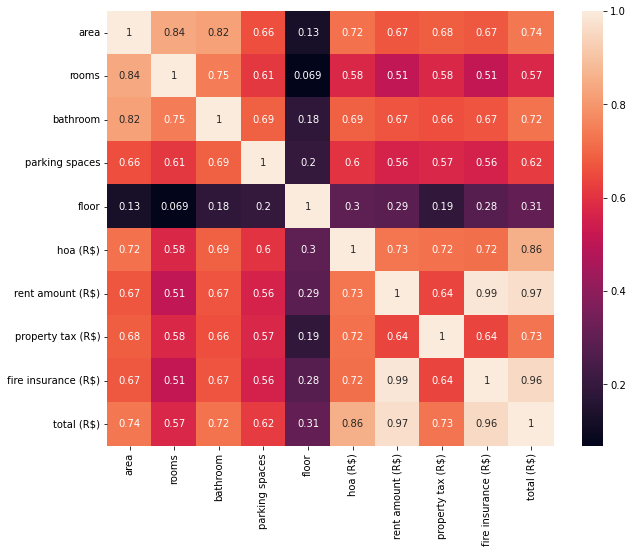

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr("spearman"), annot=True);

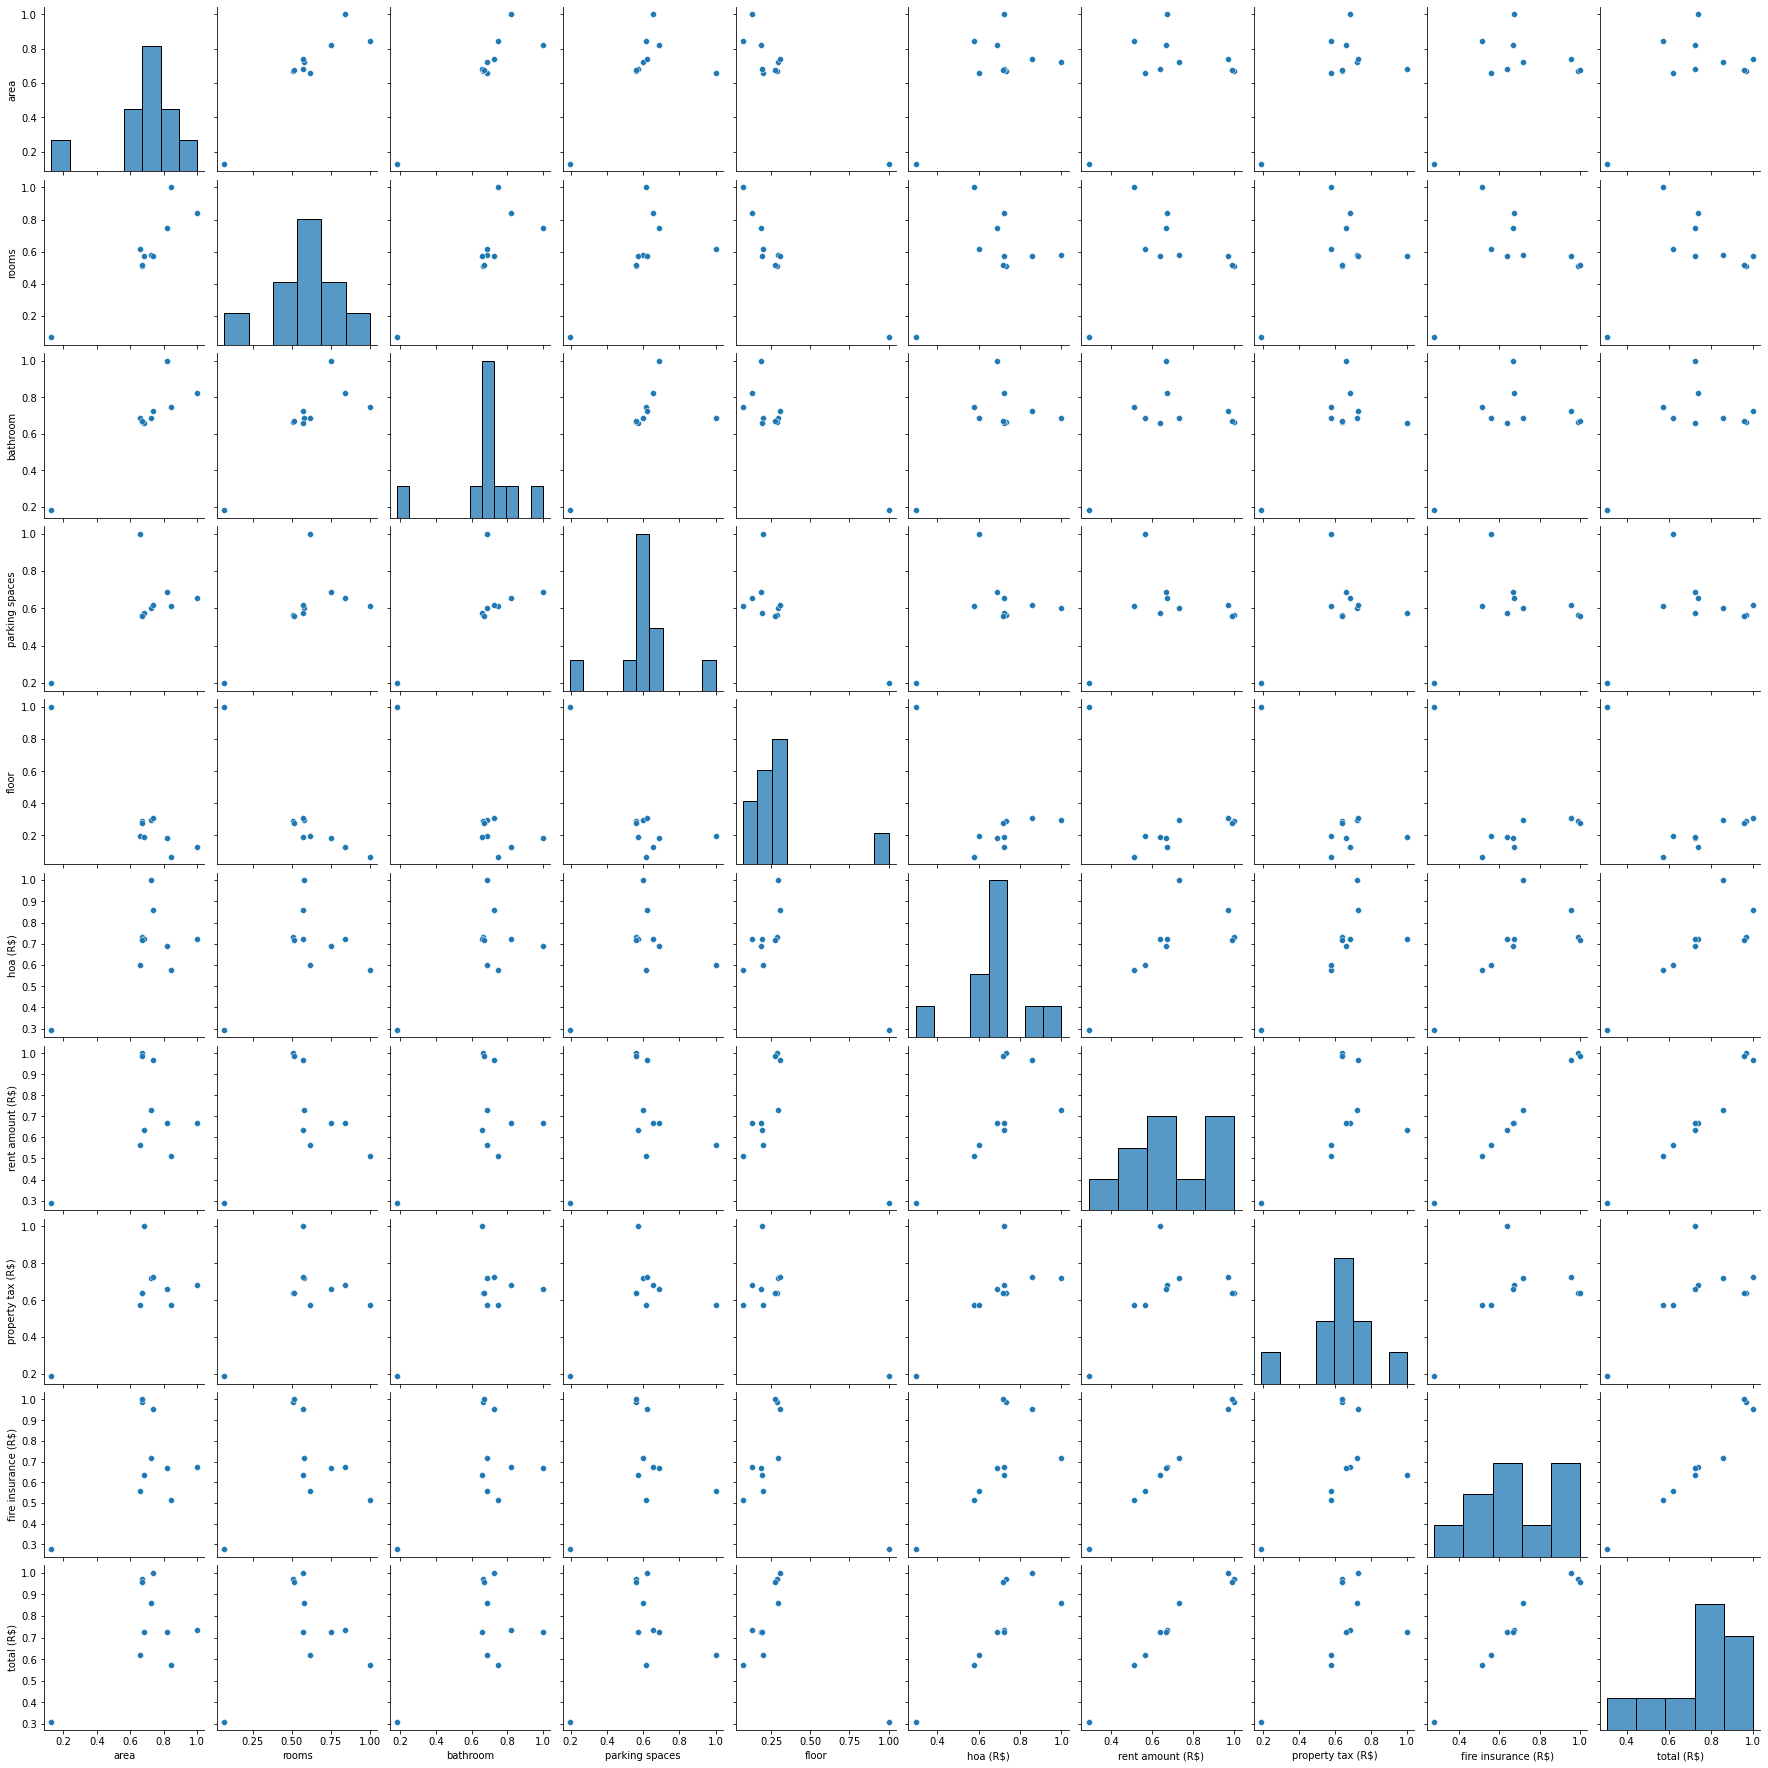

In [100]:
sns.pairplot(df.corr("spearman"));

###**Intervalo de confiança - Média dos valores de aluguéis**

**Nível de confiança = 95%**

Iremos pegar 500 amostras aleatórias:

In [101]:
import random
lista = []
for num in df["total (R$)"]:
  lista.append(num)
dados = random.sample(lista,500)

Média amostral:

In [102]:
media = pd.DataFrame(dados).mean()
media = media[0]
media

4997.916

Desvio padrão amostral:

In [103]:
desvio_padrao = pd.DataFrame(dados).std()
desvio_padrao  = desvio_padrao[0]
desvio_padrao 

4350.179786318099

Número de amostras:

In [104]:
n = len(dados)
n

500

In [105]:
from scipy.stats import norm
from scipy import stats
import math

In [106]:
stats.sem(dados)

194.54595433105558

In [107]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(4616.612936173157, 5379.219063826843)

In [108]:
margem_erro = media - intervalos[0]
margem_erro

381.30306382684284

In [109]:
print(f"Temos 95% de confiança que a média geral do valor do aluguel estará entre RS {intervalos[0]:.2f} e R$ {intervalos[1]:.2f} com uma margem de erro de RS {margem_erro:.2f} para mais e para menos")

Temos 95% de confiança que a média geral do valor do aluguel estará entre RS 4616.61 e R$ 5379.22 com uma margem de erro de RS 381.30 para mais e para menos


**De fato confirmamos abaixo que a média geral está dentro do intervalo:**

In [110]:
df["total (R$)"].mean()

5414.853949516514

### **Percebe-se abaixo que os valores dos outliers são extremamente desproporcionais:**

In [111]:
df_target = df["total (R$)"]
df_target = pd.DataFrame(df_target)
df_target

,total (R$)
0,5618
1,7973
2,3841
3,1421
4,836
...,...
10686,13670
10687,1926
10688,19260
10689,7390


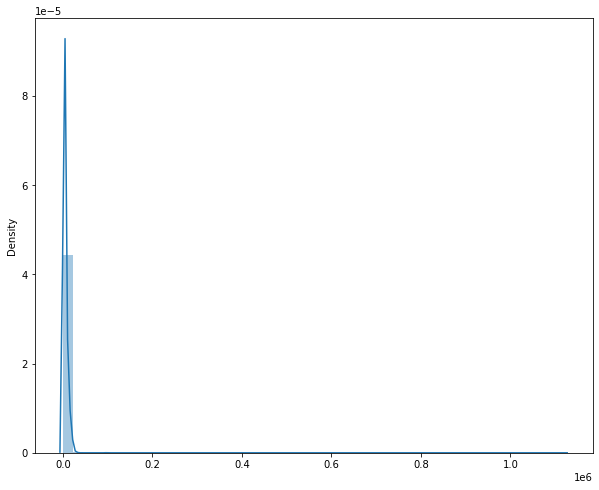

In [112]:
plt.figure(figsize=(10,8))
sns.distplot(df_target);

### **Avaliando os quartis:**

In [113]:

Q1 = df_target["total (R$)"].quantile(q=0.25) # Primeiro quartil
Q2 = df_target["total (R$)"].quantile(q=0.50) # Segundo quartil
Q3 = df_target["total (R$)"].quantile(q=0.75) # Terceiro quartil

IQR = Q3 - Q1 # Intervalo interquartílico
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
media = df_target["total (R$)"].mean()
mediana = df_target["total (R$)"].median()
moda = df_target["total (R$)"].value_counts().index[0]

print(f"Primeiro quartil: {Q1}")
print(f"Segundo quartil: {Q2}")
print(f"Terceiro quartil: {Q3}")
print(f"Intervalo interquartílico: {IQR}")
print(f"Limite superior: {sup}")
print(f"Limite inferior: {inf}")
print(f"Média geral: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda-Valor mais frequente: {moda:.2f}")


Primeiro quartil: 2116.5
Segundo quartil: 3535.0
Terceiro quartil: 6539.5
Intervalo interquartílico: 4423.0
Limite superior: 13174.0
Limite inferior: -4518.0
Média geral: 5414.85
Mediana: 3535.00
Moda-Valor mais frequente: 4089.00


**Vamos agora analisar por cada cidade:**

In [114]:
def cidades_taxas(cidade):
      cidade_incendio = df[df["city"] == cidade]
      print()
      plt.figure(figsize=(10,5))
      sns.boxplot(x=cidade_incendio["total (R$)"])
      plt.title(cidade);
      print()

      Q1 = cidade_incendio["total (R$)"].quantile(q=0.25) # Primeiro quartil
      Q2 = cidade_incendio["total (R$)"].quantile(q=0.50) # Segundo quartil
      Q3 = cidade_incendio["total (R$)"].quantile(q=0.75) # Terceiro quartil
      print()
      print("====================")
      print(f"Cidade de {cidade}")
      print("====================")
      IQR = Q3 - Q1 # Intervalo interquartílico
      inf = Q1 - 1.5 * IQR
      sup = Q3 + 1.5 * IQR
      media = cidade_incendio["total (R$)"].mean()
      mediana = cidade_incendio["total (R$)"].median()
      moda = pd.DataFrame(cidade_incendio["total (R$)"].value_counts()).index[0]

      print(f"Primeiro quartil: {Q1}")
      print(f"Segundo quartil: {Q2}")
      print(f"Terceiro quartil: {Q3}")
      print(f"Intervalo interquartílico: {IQR}")
      print(f"Limite superior: {sup}")
      print(f"Limite inferior: {inf}")
      print(f"Média geral: {media:.2f}")
      print(f"Mediana: {mediana:.2f}")
      print(f"Moda-Valor mais frequente: {moda:.2f}")
      print()
      plt.figure(figsize=(30,6))
      sns.histplot(cidade_incendio["total (R$)"], kde=True)
      plt.title("Frequência dos valores do preço do aluguel")
      print()

**São Paulo**




Cidade de São Paulo
Primeiro quartil: 2849.0
Segundo quartil: 4776.0
Terceiro quartil: 8758.0
Intervalo interquartílico: 5909.0
Limite superior: 17621.5
Limite inferior: -6014.5
Média geral: 6652.77
Mediana: 4776.00
Moda-Valor mais frequente: 4089.00




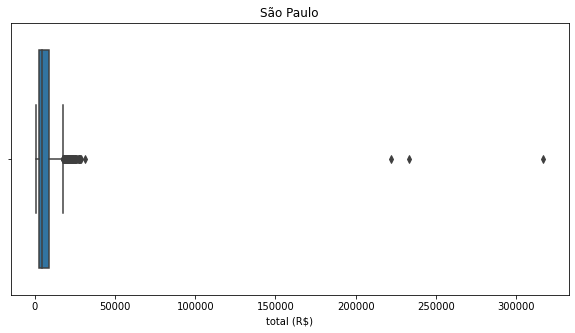

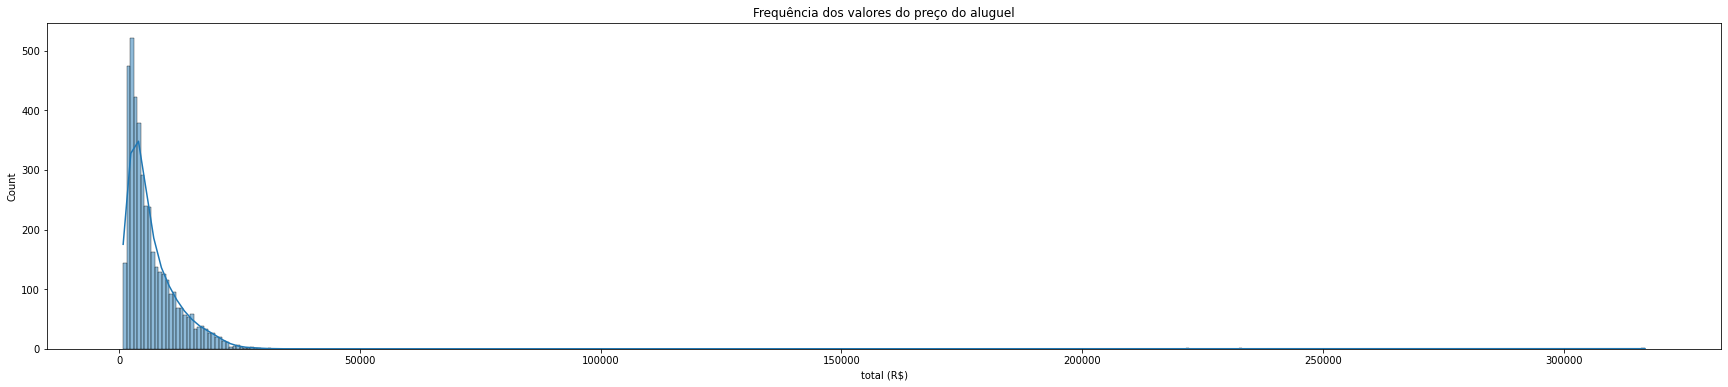

In [115]:
cidades_taxas("São Paulo")

**Rio de Janeiro**




Cidade de Rio de Janeiro
Primeiro quartil: 2234.5
Segundo quartil: 3437.0
Terceiro quartil: 5694.0
Intervalo interquartílico: 3459.5
Limite superior: 10883.25
Limite inferior: -2954.75
Média geral: 4733.42
Mediana: 3437.00
Moda-Valor mais frequente: 2837.00




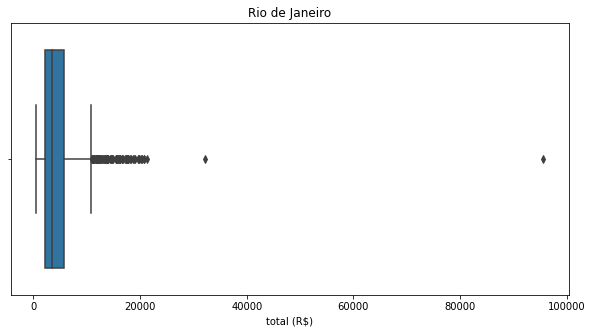

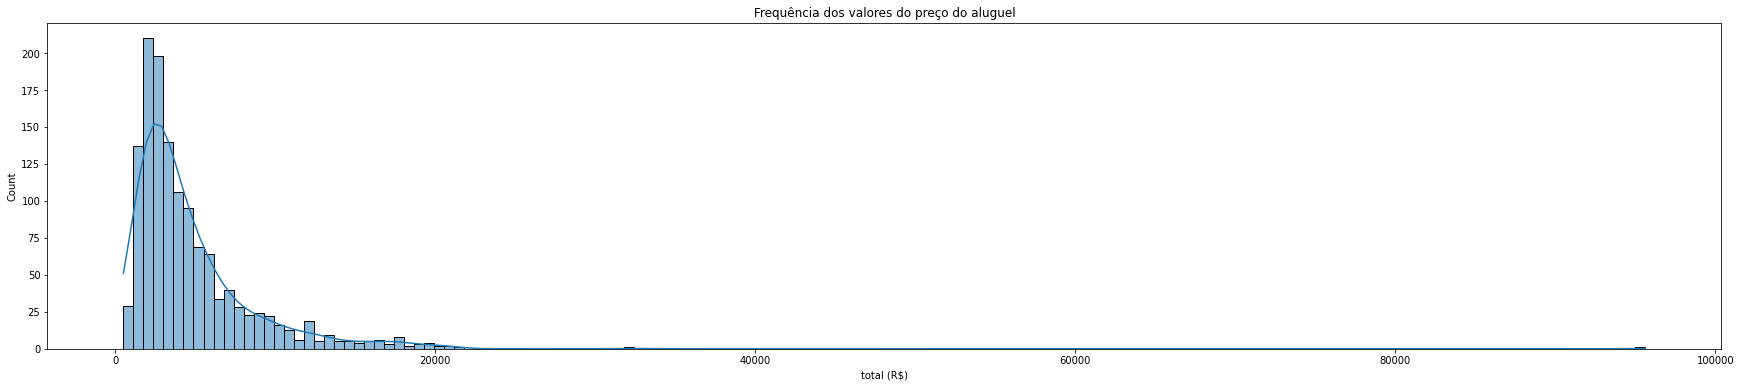

In [116]:
cidades_taxas("Rio de Janeiro")

**Belo Horizonte**




Cidade de Belo Horizonte
Primeiro quartil: 1566.5
Segundo quartil: 2614.5
Terceiro quartil: 4745.0
Intervalo interquartílico: 3178.5
Limite superior: 9512.75
Limite inferior: -3201.25
Média geral: 5349.27
Mediana: 2614.50
Moda-Valor mais frequente: 3294.00




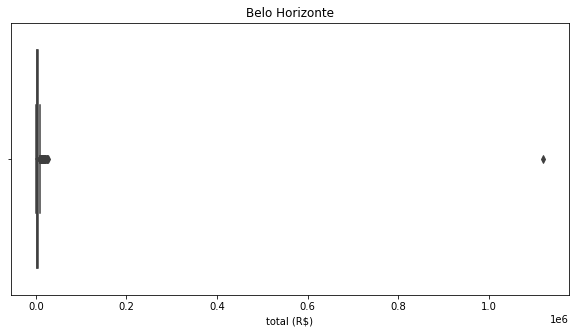

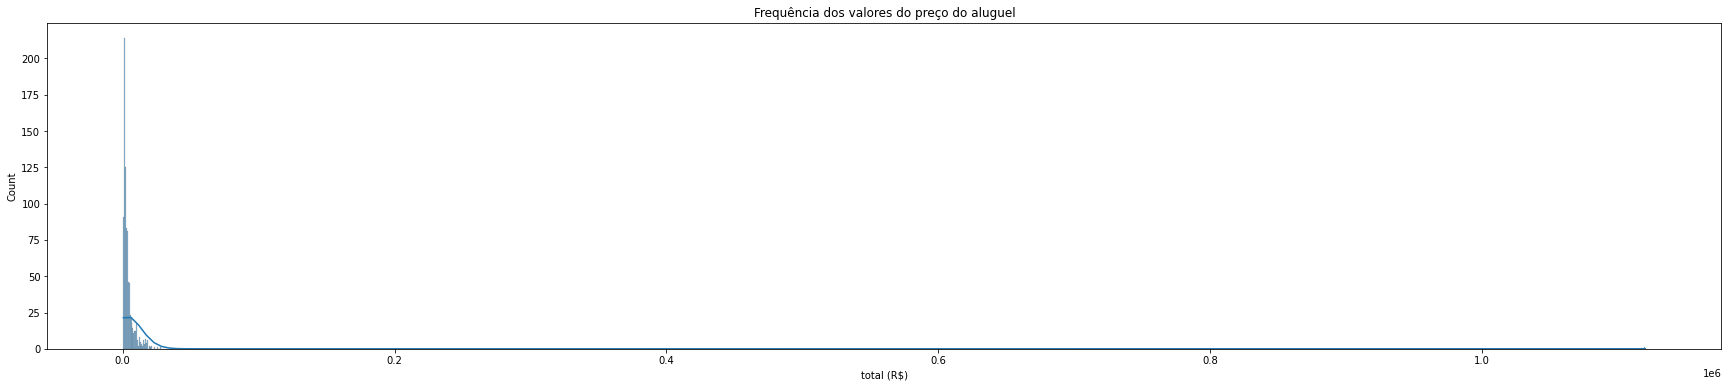

In [117]:
cidades_taxas("Belo Horizonte")

**Porto Alegre**




Cidade de Porto Alegre
Primeiro quartil: 1458.0
Segundo quartil: 2042.0
Terceiro quartil: 3116.5
Intervalo interquartílico: 1658.5
Limite superior: 5604.25
Limite inferior: -1029.75
Média geral: 2742.13
Mediana: 2042.00
Moda-Valor mais frequente: 2586.00




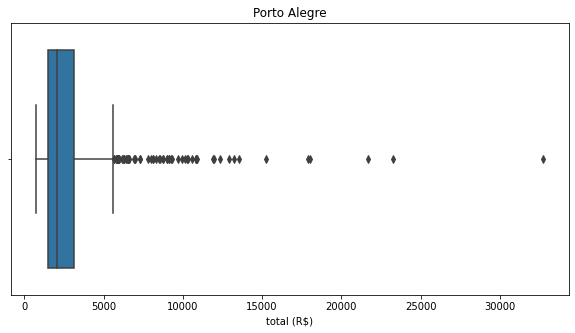

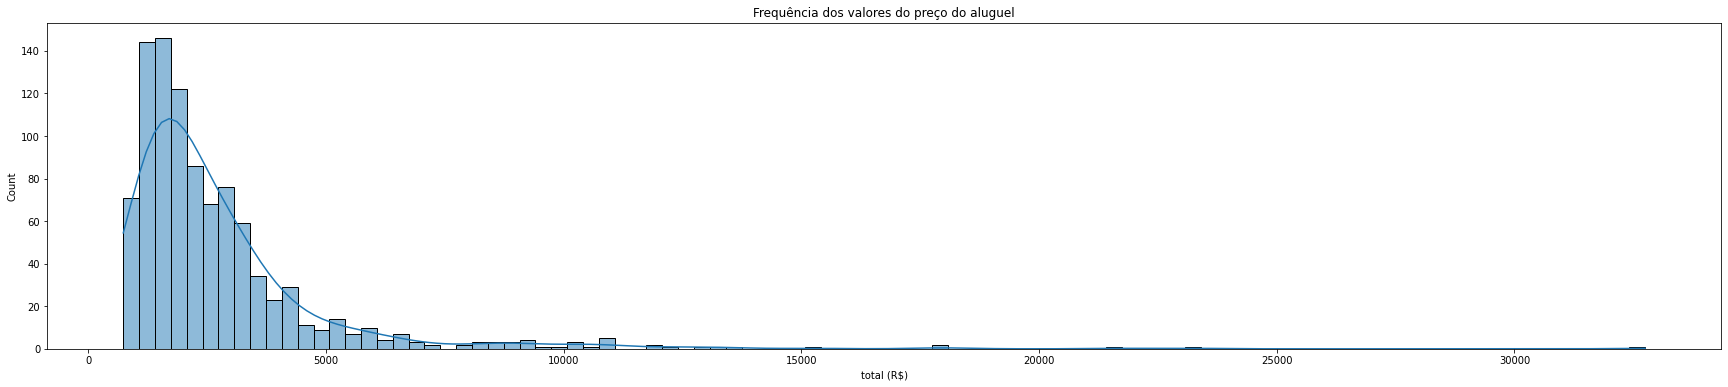

In [118]:
cidades_taxas("Porto Alegre")

**Campinas**




Cidade de Campinas
Primeiro quartil: 1360.25
Segundo quartil: 2021.5
Terceiro quartil: 3230.0
Intervalo interquartílico: 1869.75
Limite superior: 6034.625
Limite inferior: -1444.375
Média geral: 2855.50
Mediana: 2021.50
Moda-Valor mais frequente: 1109.00




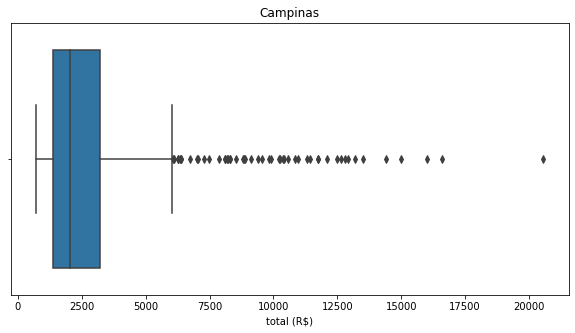

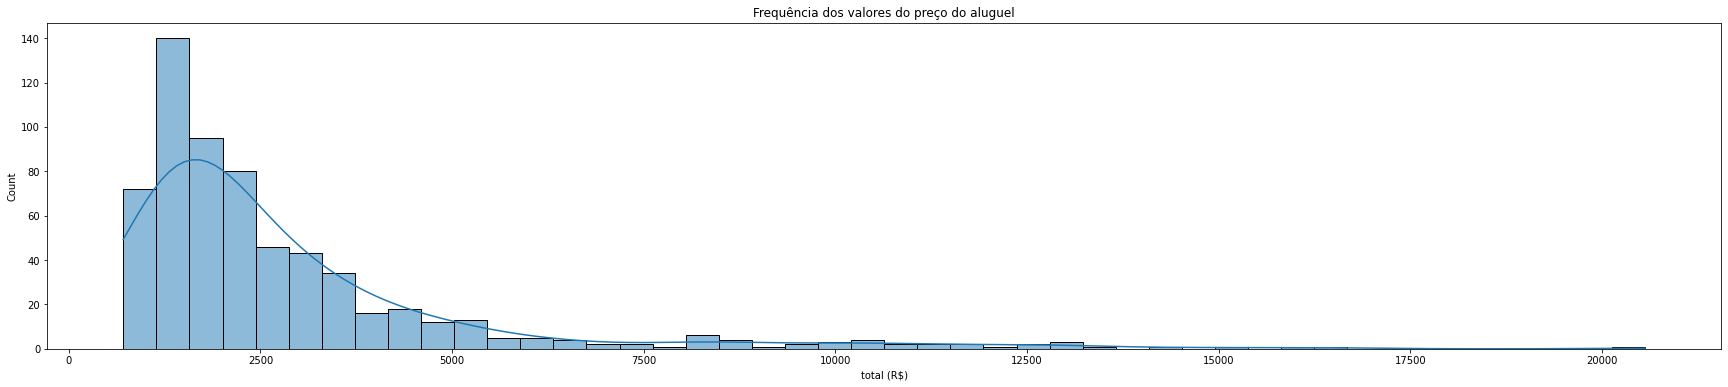

In [119]:
cidades_taxas("Campinas")

### **Retirando alguns Outliers para melhor visualização dos gráficos:**

In [120]:
df_target_so = pd.DataFrame()
df_target_so["total (R$)"] = df_target[df_target["total (R$)"] < 11000]

**Média entre todas as cidade:**

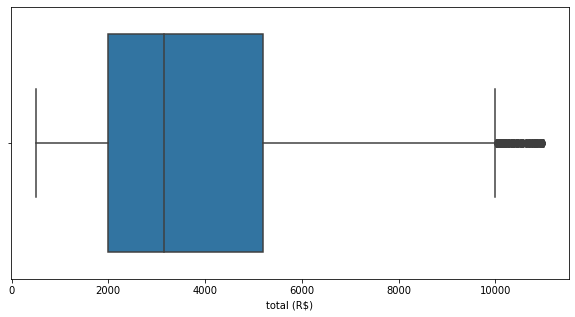

In [121]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_target_so, x="total (R$)");

### **Assimetria positiva | moda <= mediana <= média**

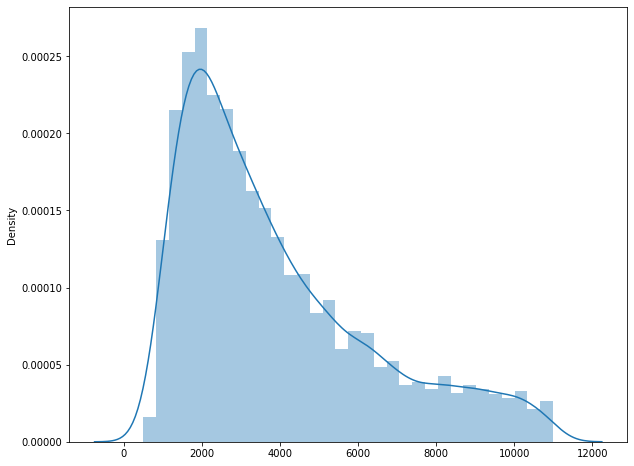

In [122]:
plt.figure(figsize=(10,8))
sns.distplot(df_target_so);

### **Avaliando a medida de curtose:**

**Para valores abaixo de 0.263 => Mesmo com os grandes quantidades e valores dos outliers o resultado identificou como Leptocúrtica, mostrando que a maioria dos seus dados se dá em torno do seu centro:**

In [123]:
Q10 = df_target["total (R$)"].quantile(q=0.1) # Décimo quartil
Q90 = df_target["total (R$)"].quantile(q=0.9) # Nonagésimo quartil
(Q3-Q1)/(2*(Q90-Q10))

0.22009355095541402

##**Ranking dos aluguéis mais caros com suas informações gerais**

In [124]:
more_expensive_all = df
more_expensive_all.sort_values(by="total (R$)", ascending=False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,Belo Horizonte,30,1,1,0,2,not acept,not furnished,0,550,0,8,558
4868,Belo Horizonte,30,1,1,0,2,acept,not furnished,0,525,25,7,557
4294,Belo Horizonte,20,1,1,0,1,not acept,not furnished,0,500,42,7,549
10218,Belo Horizonte,25,1,1,1,1,not acept,not furnished,0,500,38,7,545


##**Média geral de preço dos imóveis por cada cidade.**

Vemos que o desvio padrão de Belo Horizonte é enorme, produzindo amplitudes muito espassas dos alugueis dos imóveis.

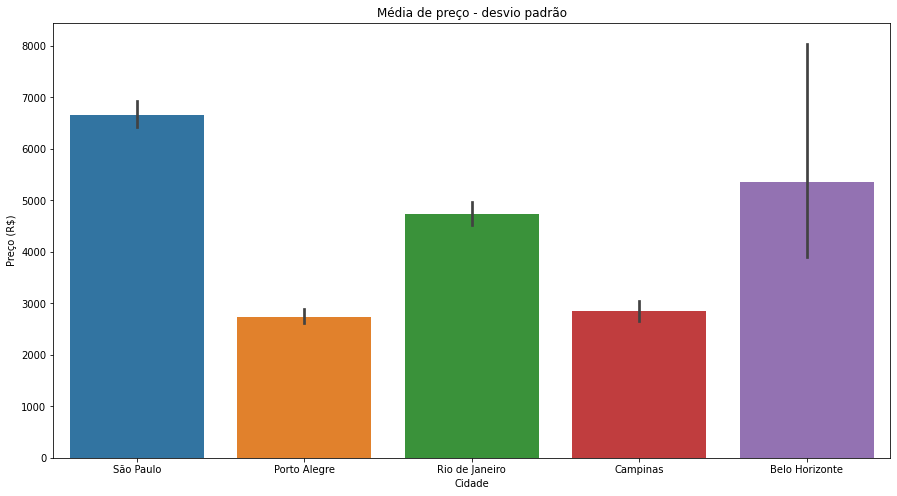

In [125]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, y="total (R$)", x="city")
plt.title("Média de preço - desvio padrão")
plt.xlabel("Cidade")
plt.ylabel("Preço (R$)"); 

##**Preço dos alugueis de cada cidade pelo número de quartos**

In [126]:
def grafico_cidade(cidade):
  lista_preco = []
  lista_media = []
  for i in sorted(df["rooms"].unique()):
    if i not in lista_preco:
      lista_preco.append(i)
      cidade_preco = df[df["rooms"] == i]
      media = cidade_preco[cidade_preco["city"] == cidade]["total (R$)"].mean()
      lista_media.append(media)

  return lista_media

In [127]:
rooms = sorted(df["rooms"].unique())

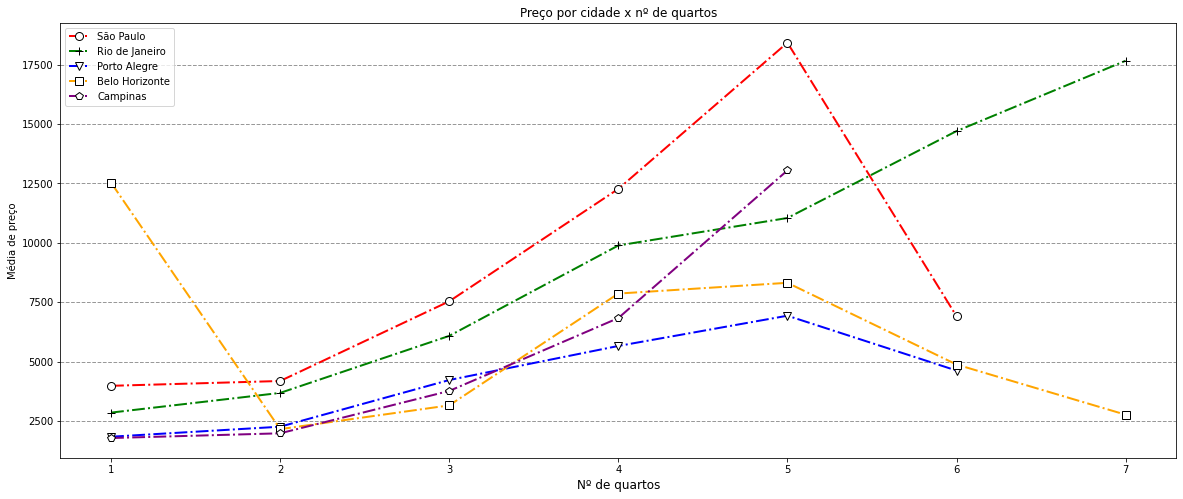

In [128]:
plt.figure(figsize=(20, 8))

plt.plot(rooms, grafico_cidade("São Paulo"), color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2) 
plt.plot(rooms, grafico_cidade("Rio de Janeiro"),color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(rooms, grafico_cidade("Porto Alegre"),color="blue", marker="v", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(rooms, grafico_cidade("Belo Horizonte"),color="orange", marker="s", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(rooms, grafico_cidade("Campinas"),color="purple", marker="p", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
# Rótulos

plt.title("Preço por cidade x nº de quartos", loc="center")
plt.xlabel("Nº de quartos", color="black", size=12)
plt.ylabel("Média de preço")
plt.legend(["São Paulo", "Rio de Janeiro", "Porto Alegre", "Belo Horizonte", "Campinas"])

#Gridlines
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()

##**Número de imóveis existentes igual ou acima dos R$ 6.000,00.**

Vamos apenas tomar um exemplo:

In [129]:
acima_seisMil = df[df["total (R$)"] >= 6000]["city"]
acima_seisMil = pd.DataFrame(acima_seisMil)
acima_seisMil.value_counts()

city          
São Paulo         1669
Rio de Janeiro     299
Belo Horizonte     168
Porto Alegre        54
Campinas            52
dtype: int64

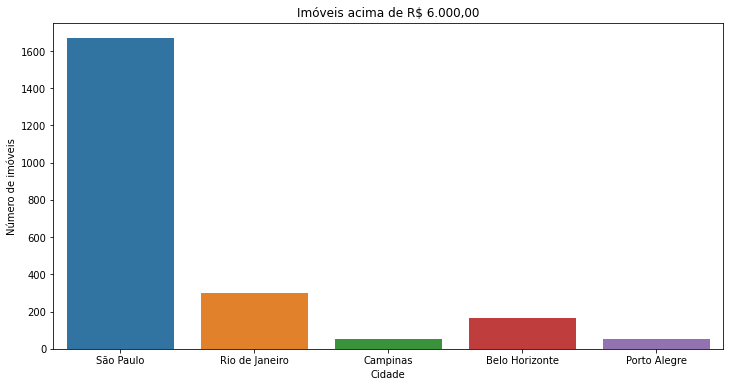

In [130]:
plt.figure(figsize=(12,6))
sns.countplot(data=acima_seisMil, x="city")
plt.title("Imóveis acima de R$ 6.000,00")
plt.xlabel("Cidade")
plt.ylabel("Número de imóveis");

In [131]:
sp = (len(acima_seisMil[acima_seisMil["city"] == "São Paulo"]["city"])/len(df[df["city"] == "São Paulo"]["city"]))*100
rj = (len(acima_seisMil[acima_seisMil["city"] == "Rio de Janeiro"]["city"])/len(df[df["city"] == "Rio de Janeiro"]["city"]))*100
bh = (len(acima_seisMil[acima_seisMil["city"] == "Belo Horizonte"]["city"])/len(df[df["city"] == "Belo Horizonte"]["city"]))*100
poa = (len(acima_seisMil[acima_seisMil["city"] == "Porto Alegre"]["city"])/len(df[df["city"] == "Porto Alegre"]["city"]))*100
cp = (len(acima_seisMil[acima_seisMil["city"] == "Campinas"]["city"])/len(df[df["city"] == "Campinas"]["city"]))*100

In [132]:
ordem = [sp, rj, bh, poa, cp]
ordem.sort( reverse=True)

In [133]:
tabela_maisCaros = pd.DataFrame()
tabela_maisCaros["city"] = ["São Paulo", "Belo Horizonte", "Rio de Janeiro", "Campinas", "Porto Alegre"]
tabela_maisCaros["Porcentagem (%)"] = ordem

Em porcentagem:

In [134]:
tabela_maisCaros

,city,Porcentagem (%)
0,São Paulo,40.149146
1,Belo Horizonte,22.330097
2,Rio de Janeiro,19.134396
3,Campinas,8.306709
4,Porto Alegre,5.607477


Breve análise:


*   Apesar de Porto Alegre ter a 3ª maior quantidade de amostra ela está em último no ranking entre as cidades com imóveis mais caros acima de R$ 6.000,00 com 5,60%

*   Belo Horizonte que está em 4º na quantidade do número de amostras aparece em 2º no ranking de cidade mais caras entre imóveis acima de R$ 6.000,00 com 22,33

Vejamos abaixo:



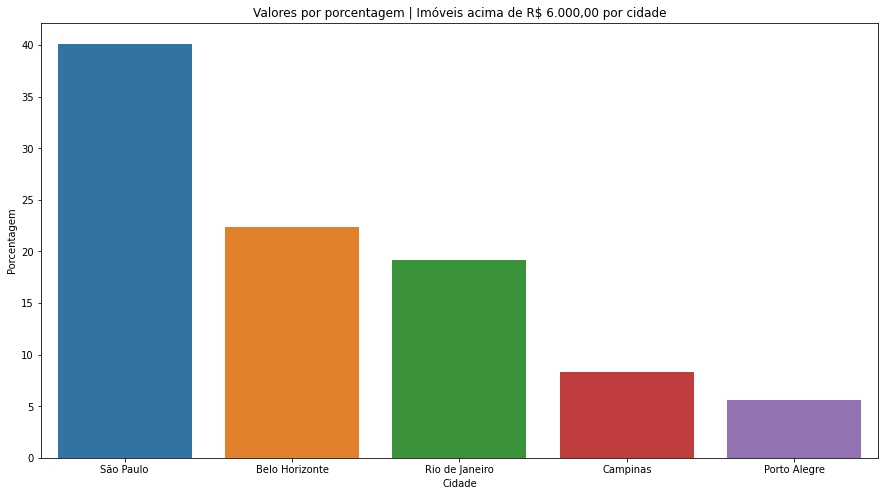

In [135]:
plt.figure(figsize=(15, 8))

sns.barplot(data=tabela_maisCaros, y="Porcentagem (%)", x="city")
plt.title("Valores por porcentagem | Imóveis acima de R$ 6.000,00 por cidade")
plt.xlabel("Cidade")
plt.ylabel("Porcentagem"); 

##**Qual imóvel tem o maior valor? E quais os seus dados?**


In [136]:
city_area_total = df[["city", "area", "total (R$)"]]
city_area_total.sort_values(by="total (R$)", ascending=False)

,city,area,total (R$)
255,Belo Horizonte,155,1120000
6645,São Paulo,42,316900
6230,São Paulo,340,233200
2859,São Paulo,285,222100
2928,Rio de Janeiro,35,95610
...,...,...,...
1847,Belo Horizonte,30,558
4868,Belo Horizonte,30,557
4294,Belo Horizonte,20,549
10218,Belo Horizonte,25,545


**O imóvel mais caro fica em Belo Horizonte o com 155,00m² no 4º andar com 1 quarto, confirmando o que vimos acima que os imóveis de 1 quarto tem a média de preço mais elevada.**




In [137]:
df[df["total (R$)"] == 1120000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


##**Quais são as informações do imóvel de maior área que está para alugar?**



In [138]:
maior_area = df["area"].max()
df[df["area"] == maior_area]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220


##**Quanto custa o imóvel que fica no andar mais elevado?**



In [139]:
mais_elevado = df["floor"].max()
df[df["floor"] == mais_elevado]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164,35,3549


In [140]:
mais_caro = df[df["floor"] == mais_elevado]["total (R$)"]
mais_caro = pd.DataFrame(mais_caro)
mais_caro = mais_caro.reset_index()
mais_caro = mais_caro["total (R$)"][0]
print(f"R${mais_caro}")

R$3549


## **Média de valores por área abaixo dos 250m²**

Retirando algumas Outliers para poder vizualisar o gráfico. Analisei os imóveis mais "populares" abaixo de 250m².

In [141]:
df_so = df[df["area"] < 250]
df_so = df_so[df_so["total (R$)"] < 10000]

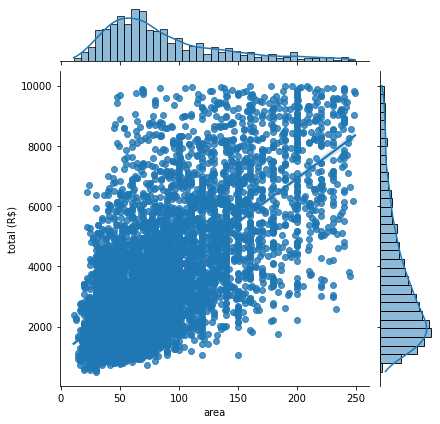

In [142]:
sns.jointplot(x=df_so["area"], y=df_so["total (R$)"], kind="reg");

Criei um coluna de classes para colocar os valores em intervalos e facilitar a visualização:

In [143]:
df_so["area"].max(), df_so["area"].min()

(249, 11)

In [144]:
df_so["classes_area"] = pd.cut(x=df_so["area"], bins = 10, right=True)
area_total = df_so[["area","classes_area"]]
area_total

,area,classes_area
0,70,"(58.6, 82.4]"
2,80,"(58.6, 82.4]"
3,51,"(34.8, 58.6]"
4,25,"(10.762, 34.8]"
6,72,"(58.6, 82.4]"
...,...,...
10682,160,"(153.8, 177.6]"
10684,98,"(82.4, 106.2]"
10685,83,"(82.4, 106.2]"
10687,63,"(58.6, 82.4]"


**Média dos valores dentro do intervalo de áreas:**

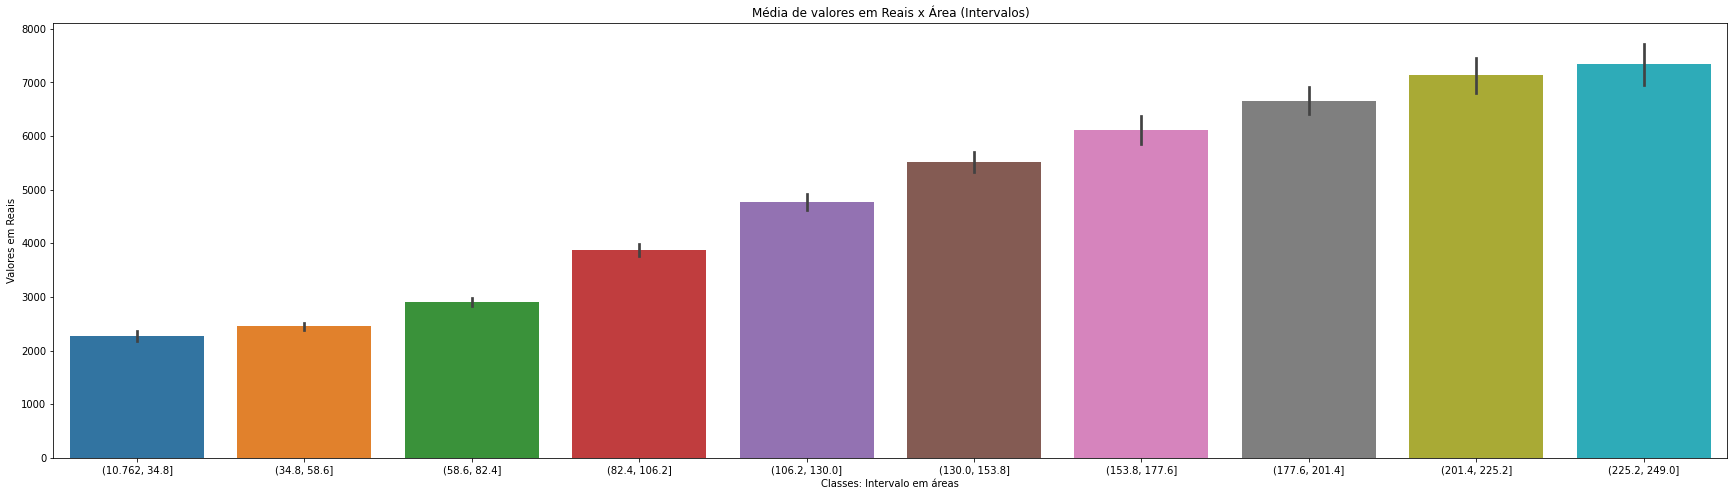

In [145]:
plt.figure(figsize=(30, 8))
sns.barplot(data=df_so, x="classes_area", y="total (R$)", )
plt.title("Média de valores em Reais x Área (Intervalos)")
plt.xlabel("Classes: Intervalo em áreas")
plt.ylabel("Valores em Reais");

**Média dos valores considerando o número de quartos dentro do intervalo de área:**

**Vemos que até 201m² os imóveis de 1 quarto tem a tendência de terem os alugueis mais caros. Válido apenas para imóveis abaixo desta área**

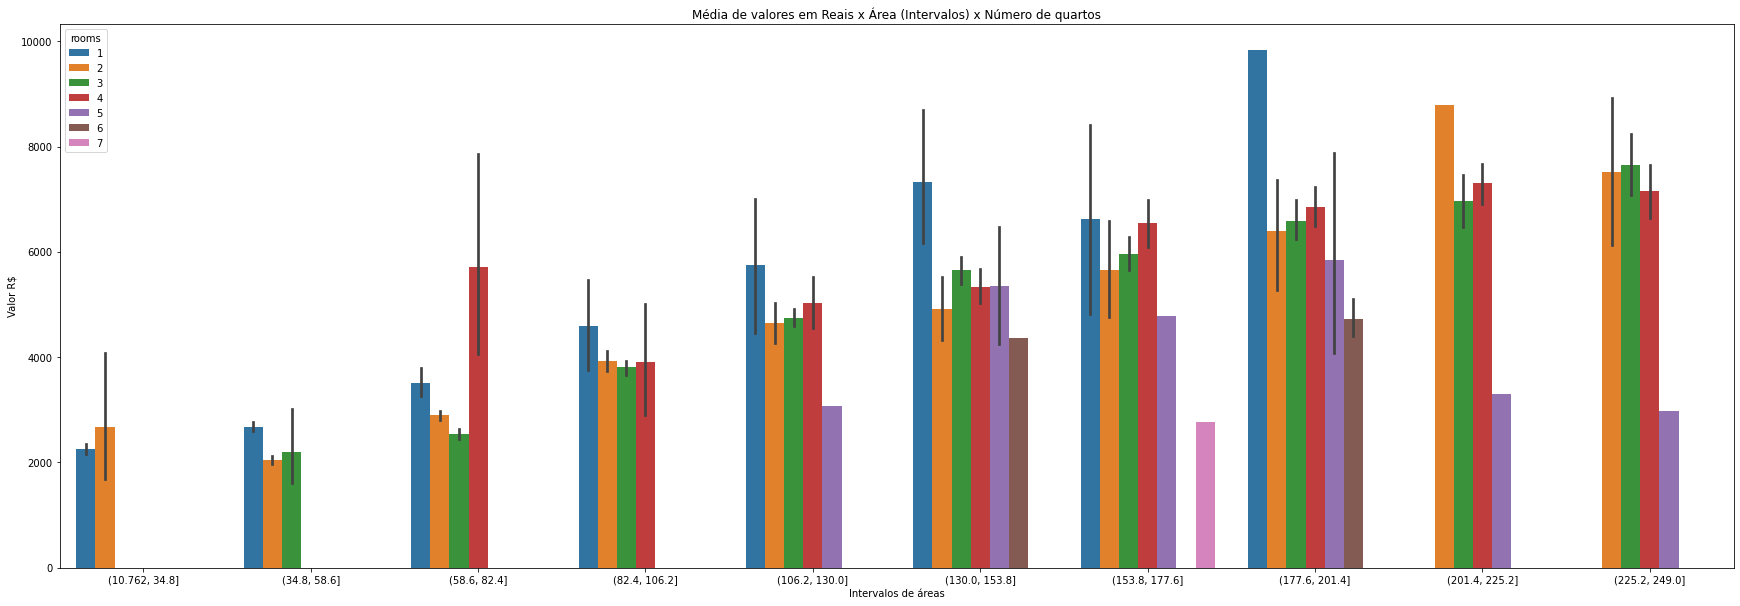

In [146]:
plt.figure(figsize=(30, 10))
sns.barplot(data=df_so, x="classes_area", y="total (R$)", hue="rooms")
plt.title("Média de valores em Reais x Área (Intervalos) x Número de quartos")
plt.xlabel("Intervalos de áreas")
plt.ylabel("Valor R$");

##**Os imóveis mobiliados tornam os aluguéis mais caros?**


**Veremos na tabela e gráfico abaixo:**

In [147]:
floor_total_area = df[["furniture", "total (R$)", "area"]]
floor_total_area.sort_values(by="total (R$)", ascending=False)

,furniture,total (R$),area
255,not furnished,1120000,155
6645,not furnished,316900,42
6230,not furnished,233200,340
2859,furnished,222100,285
2928,furnished,95610,35
...,...,...,...
1847,not furnished,558,30
4868,not furnished,557,30
4294,not furnished,549,20
10218,not furnished,545,25


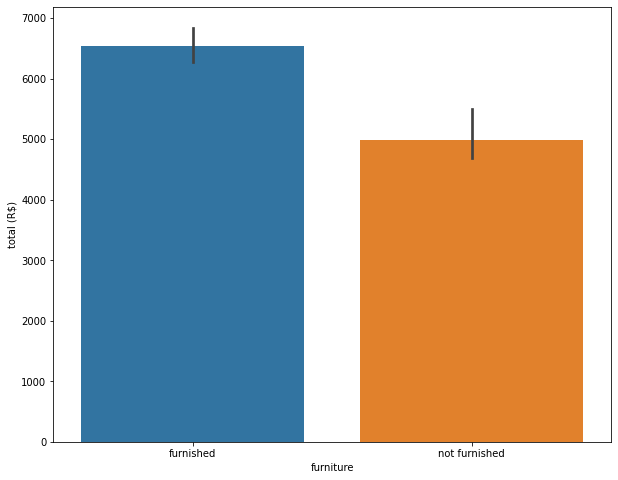

In [148]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="furniture", y="total (R$)");

Pela média geral percebe-se que o mobiliado é mais caro, vamos analisar pontualmente e pegar por área e posteriormente por andar:

Vamos primeiro analisar os imóveis por área:

In [149]:
df_so["classes_area"] = pd.cut(x=df_so["area"], bins = 10, right=True)
area_total = df_so[["furniture", "area","classes_area", "total (R$)"]]
area_total

,furniture,area,classes_area,total (R$)
0,furnished,70,"(58.6, 82.4]",5618
2,not furnished,80,"(58.6, 82.4]",3841
3,not furnished,51,"(34.8, 58.6]",1421
4,not furnished,25,"(10.762, 34.8]",836
6,not furnished,72,"(58.6, 82.4]",2750
...,...,...,...,...
10682,furnished,160,"(153.8, 177.6]",4419
10684,not furnished,98,"(82.4, 106.2]",4695
10685,not furnished,83,"(82.4, 106.2]",8726
10687,furnished,63,"(58.6, 82.4]",1926


**Vemos abaixo que os imóveis mobiliados contém uma média maior no valor do aluguel com o aumento da área**. 

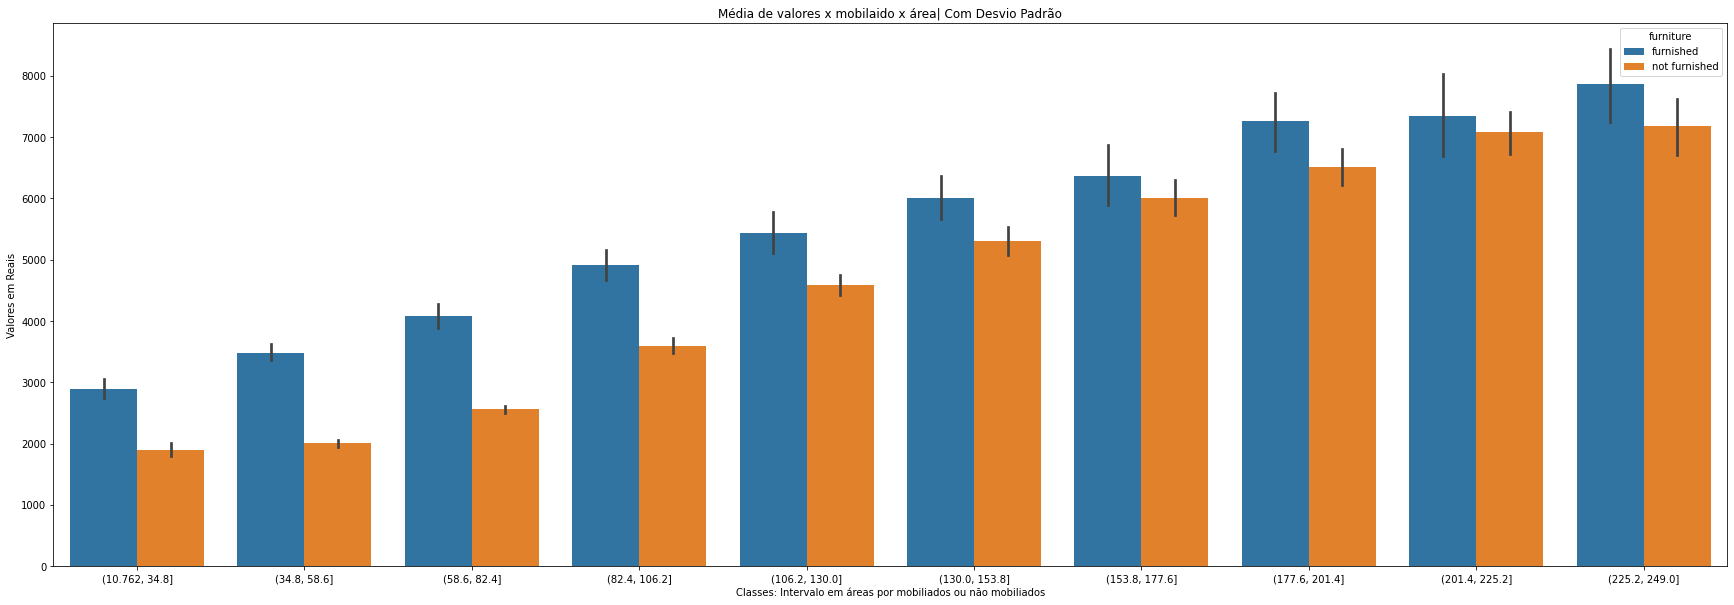

In [150]:
plt.figure(figsize=(30, 10))
sns.barplot(data=area_total, x="classes_area", y="total (R$)", hue="furniture")
plt.title("Média de valores x mobilaido x área| Com Desvio Padrão")
plt.xlabel("Classes: Intervalo em áreas por mobiliados ou não mobiliados")
plt.ylabel("Valores em Reais");

**Vamos agora analisar por cada andar:**

In [151]:
df_area_valorTotal = df[["furniture", "floor", "total (R$)"]]
df_area_valorTotal.sort_values(by="total (R$)", ascending=False)

,furniture,floor,total (R$)
255,not furnished,4,1120000
6645,not furnished,6,316900
6230,not furnished,7,233200
2859,furnished,6,222100
2928,furnished,1,95610
...,...,...,...
1847,not furnished,2,558
4868,not furnished,2,557
4294,not furnished,1,549
10218,not furnished,1,545


**Percebemos que até o 20º andar os imóveis se tornam mais caros sendo alugados mobiliados, depois há uma variação nos casos, como vemos no gráfico abaixo:**

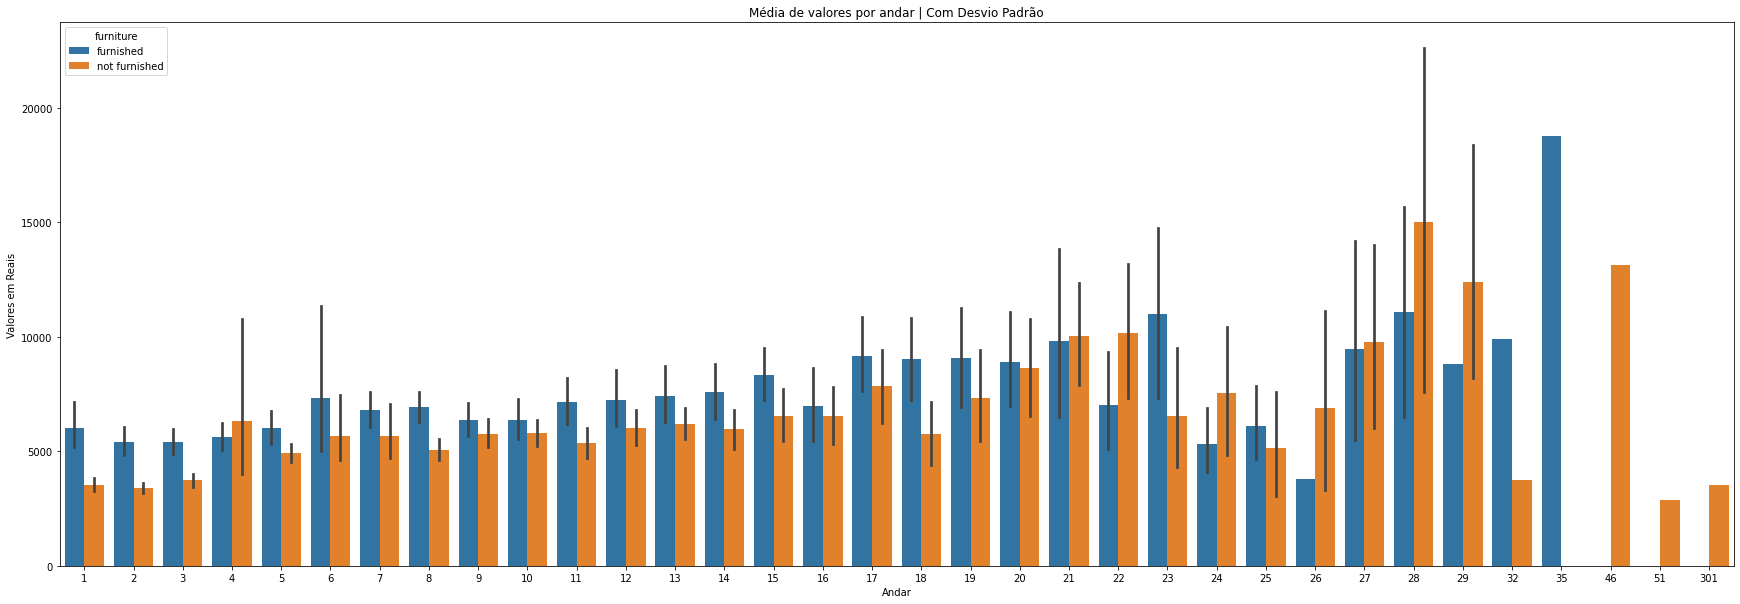

In [152]:
plt.figure(figsize=(30, 10))
sns.barplot(data=df, x="floor", y="total (R$)", hue="furniture")
plt.title("Média de valores por andar | Com Desvio Padrão")
plt.xlabel("Andar")
plt.ylabel("Valores em Reais");

##**O valor do imóvel mobiliado varia caso não aceite animais de estimação?**

In [153]:
df_animal = df[["animal", "total (R$)"]]
df_animal = df_animal.sort_values(ascending=False, by="total (R$)")
df_animal

,animal,total (R$)
255,not acept,1120000
6645,not acept,316900
6230,acept,233200
2859,acept,222100
2928,acept,95610
...,...,...
1847,not acept,558
4868,acept,557
4294,not acept,549
10218,not acept,545


**Percebe-se que nos tipos de imóveis que aceitam animais de estimação os mobiliados são os mais caros dos que o que não aceitam. Para quem não tem animal de estimação é muito mais viável procurar imóveis não mobiliados que aceitam animais de estimação.**

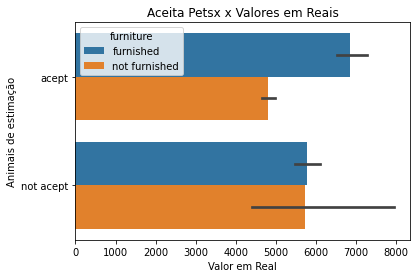

In [154]:
sns.barplot(data=df, x="total (R$)", y="animal", hue="furniture")
plt.title("Aceita Petsx x Valores em Reais")
plt.xlabel("Valor em Real")
plt.ylabel("Animais de estimação");

##**Quais os imóveis de 3 quartos até o 10º andar são mais viáveis financeiramente?**

In [ ]:
df_so["classes_area"] = pd.cut(x=df_so["area"], bins = 5, right=True)
area_classes = df_so[["classes_area", "rooms", "floor", "total (R$)"]]

In [ ]:
area_classes = area_classes[area_classes["rooms"] == 3]
area_classes = area_classes[area_classes["floor"] <=10]
area_classes

,classes_area,rooms,floor,total (R$)
24,"(58.6, 106.2]",3,7,2742
50,"(58.6, 106.2]",3,10,5246
58,"(58.6, 106.2]",3,9,2276
67,"(106.2, 153.8]",3,7,3857
72,"(106.2, 153.8]",3,7,7396
...,...,...,...,...
10647,"(201.4, 249.0]",3,9,9759
10651,"(58.6, 106.2]",3,7,3886
10670,"(153.8, 201.4]",3,2,3979
10682,"(153.8, 201.4]",3,4,4419


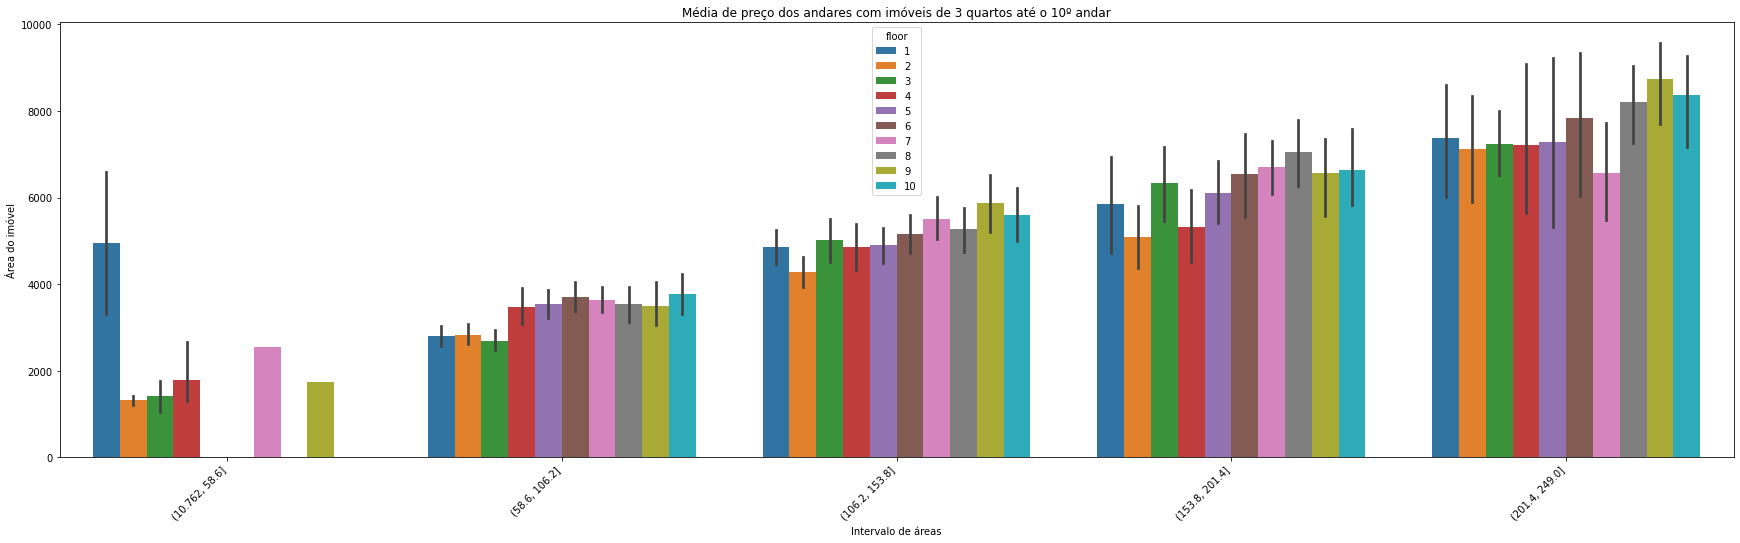

In [ ]:
plt.figure(figsize=(30,8))
sns.barplot(data=area_classes, y="total (R$)", x="classes_area", hue="floor")
plt.title("Média de preço dos andares com imóveis de 3 quartos até o 10º andar")
plt.xlabel("Intervalo de áreas")
plt.ylabel("Área do imóvel")
plt.xticks(rotation=45, ha="right");

##**Qual a cidade onde a média a taxa de seguro contra incêndio é mais cara? Os andares influenciam no valor final?**

In [155]:
df_fogo_valor = df[["city", "floor", "fire insurance (R$)"]]
df_fogo_valor.sort_values(ascending=False, by="fire insurance (R$)")

,city,floor,fire insurance (R$)
2619,São Paulo,1,305
1253,São Paulo,14,254
2859,São Paulo,6,254
157,São Paulo,12,254
1743,São Paulo,1,254
...,...,...,...
4734,Campinas,3,5
8104,Campinas,3,4
6376,São Paulo,4,4
9297,Campinas,7,3


**Média geral em cada cidade:**

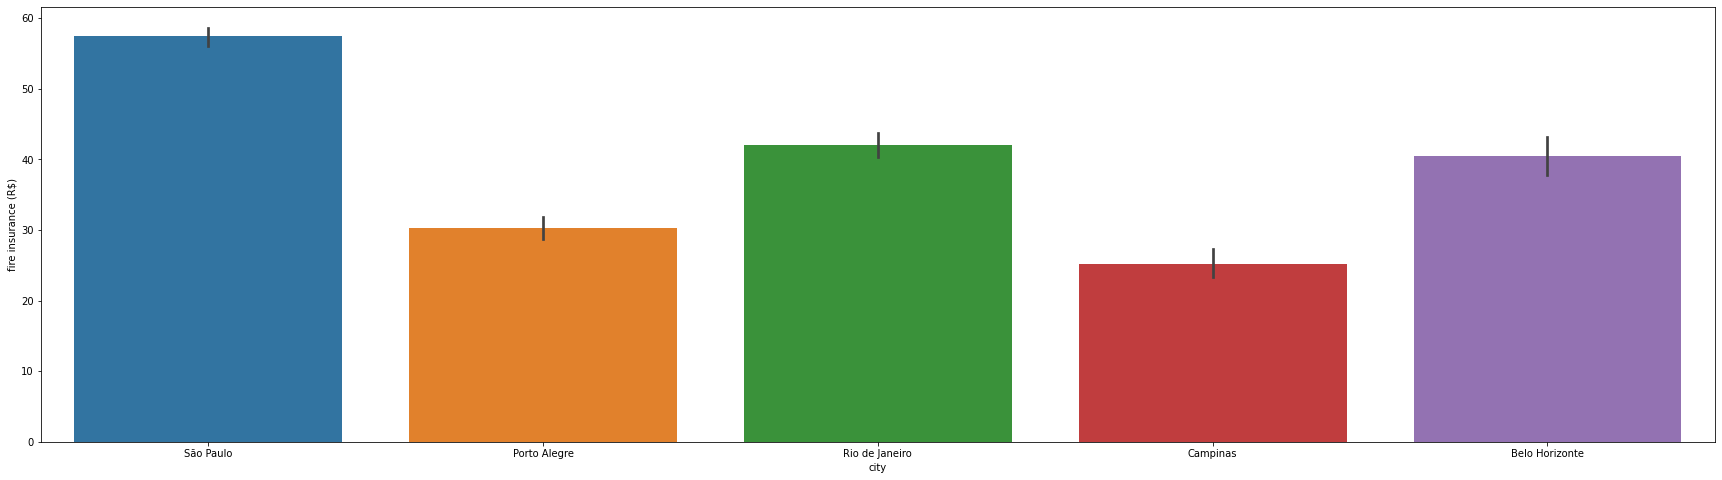

In [156]:
plt.figure(figsize=(30,8))
sns.barplot(data=df_fogo_valor, x="city", y="fire insurance (R$)");

**Percebemos que há um certo crescimento nos taxas de combate à incêndio quando aumentamos a andar. Belo Horizonte tem as taxas de incêndio mais elevadas**

In [157]:
df_max = df[df["floor"] < 50]

In [158]:
def grafico_cidade(cidade):
  lista_fire= []
  lista_media = []
  for i in sorted(df_max["floor"].unique()):
    if i not in lista_fire:
      lista_fire.append(i)
      cidade_fire = df_max[df_max["floor"] == i]
      media = cidade_fire[cidade_fire["city"] == cidade]["fire insurance (R$)"].mean()
      lista_media.append(media)

  return lista_media

In [159]:
fire = sorted(df_max["floor"].unique())

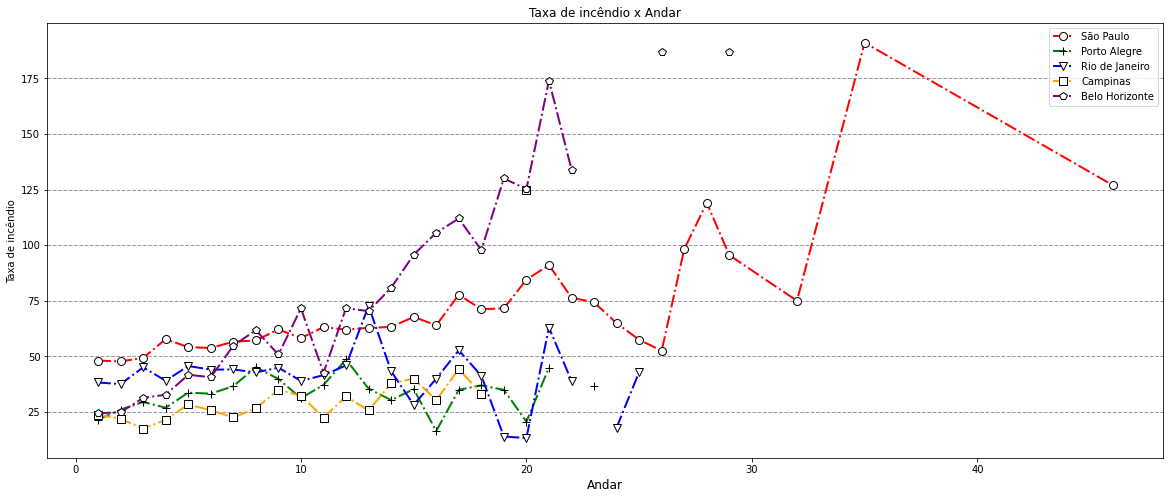

In [160]:
plt.figure(figsize=(20, 8))

plt.plot(fire, grafico_cidade("São Paulo"), color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2) 
plt.plot(fire, grafico_cidade("Porto Alegre"),color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(fire, grafico_cidade("Rio de Janeiro"),color="blue", marker="v", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(fire, grafico_cidade("Campinas"),color="orange", marker="s", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(fire, grafico_cidade("Belo Horizonte"),color="purple", marker="p", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)

# Rótulos
plt.title("Taxa de incêndio x Andar", loc="center")
plt.xlabel("Andar", color="black", size=12)
plt.ylabel("Taxa de incêndio")
plt.legend(["São Paulo", "Porto Alegre", "Rio de Janeiro", "Campinas", "Belo Horizonte", "Northern Victoria", "Eastern Victoria", "Western Victoria"])

#Gridlines
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()

**Olhando através de outro gráfico:**

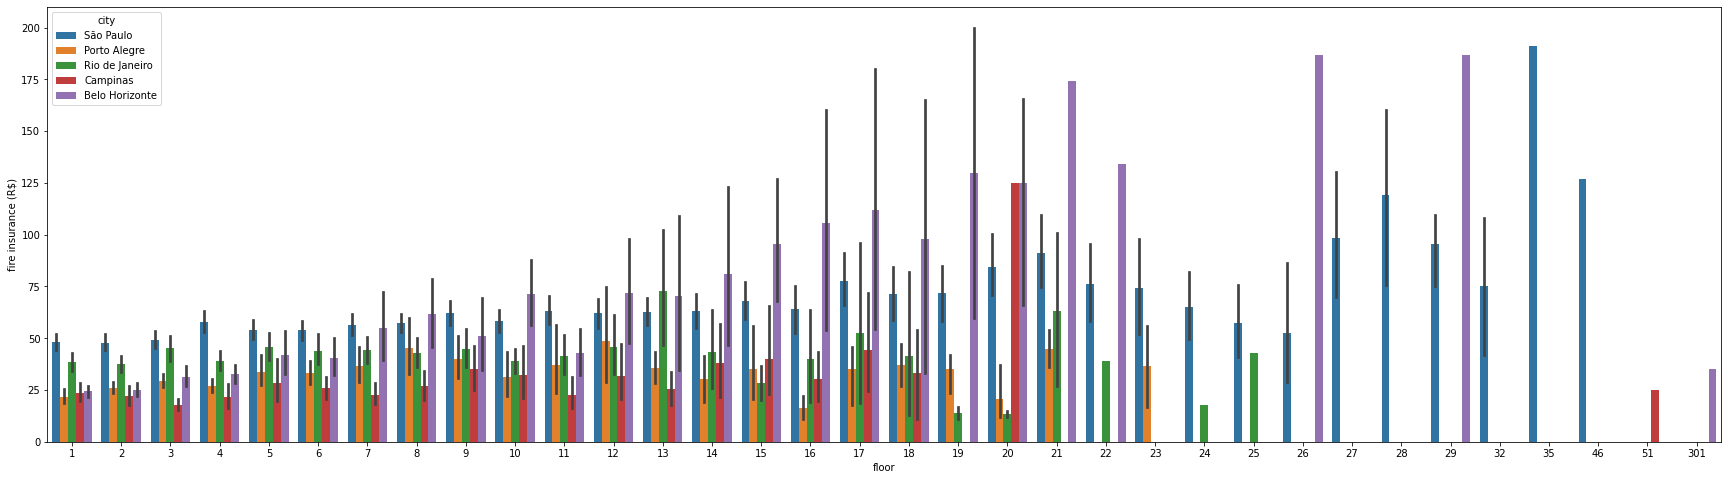

In [161]:
plt.figure(figsize=(30,8))
sns.barplot(data=df_fogo_valor, x="floor", y="fire insurance (R$)", hue="city");

## **Qual a taxa de combate a incêndio do 301º andar?**

In [162]:
df_301_incendio = pd.DataFrame(df[df["floor"]==301]["fire insurance (R$)"])
df_301_incendio = df_301_incendio.reset_index()
df_301_incendio = df_301_incendio["fire insurance (R$)"][0]
print(f"R$ {df_301_incendio},00")

R$ 35,00


##**A taxa de incêndio equivale a quanto no valor total do preço do aluguel? Qual a cidade tem a maior taxa?**

**No geral:**

In [163]:
taxa = df["fire insurance (R$)"].sum()
total = df["total (R$)"].sum()
dif = (taxa/total)*100
print(f"Uma média de apenas {dif:.2f}%")

Uma média de apenas 0.87%


**Por cada cidade:**

**Belo Horizonte tem no geral as taxas mais caras, mas proporcionalmente em relação ao valor total do aluguel Porto Alegre tem a porcentagem mais elevada**

In [164]:
lista_cid = []
lista_taxa = []
lista_total = []
lista_porc = []
for cid in df["city"]:
  if cid not in lista_cid:
    lista_cid.append(cid)
    df_c = df[df["city"]==cid]
    taxa_c = df_c["fire insurance (R$)"].sum()
    lista_taxa.append(taxa_c)
    total_c = df_c["total (R$)"].sum()
    lista_total.append(total_c)
    dif_c = (taxa_c/total_c)*100
    lista_porc.append(dif_c)
tabela_taxa_porc = pd.DataFrame()
tabela_taxa_porc["cidade"] = lista_cid
tabela_taxa_porc["taxa de incêndio"] = lista_taxa
tabela_taxa_porc["Valor Total"] = lista_total
tabela_taxa_porc["Valor em %"] = lista_porc
tabela_taxa_porc
    

,cidade,taxa de incêndio,Valor Total,Valor em %
0,São Paulo,238688,27655562,0.863074
1,Porto Alegre,29127,2640672,1.103015
2,Rio de Janeiro,56362,6338048,0.889264
3,Campinas,15780,1787543,0.882776
4,Belo Horizonte,35512,4696657,0.756112


**Cidade com maior média de taxa:**

In [165]:
maior_taxa = tabela_taxa_porc.sort_values(ascending=False, by="Valor em %")
maior_taxa = maior_taxa[["cidade", "Valor em %"]]
maior_taxa[:1]

,cidade,Valor em %
1,Porto Alegre,1.103015


##**Quantos apartamentos que tem 3 vagas de garagem tem o menor preço? Fica em qual andar e cidade?**

In [167]:
df_3vagas = df[df["parking spaces"] == 3]
df_3vagas = df_3vagas.sort_values(by="total (R$)")
df_3vagas = df_3vagas[["city", "parking spaces", "floor", "total (R$)"]]
qto_df_3vagas = len(df_3vagas)
print(f"{qto_df_3vagas} imóveis com 3 vagas")
print("Imóveis com maior preço com seu andar e cidade:")
df_3vagas[:1]

686 imóveis com 3 vagas
Imóveis com maior preço com seu andar e cidade:


,city,parking spaces,floor,total (R$)
2094,Belo Horizonte,3,7,1946
